1. Read the attached PDF and load pages 20 to 30 in a text file using Python
2. Extract all the name entities in the these pages (20 to 30) using NLP

Sol:

Data Extracted through PDF

Data Cleansing and Preprocessing

Data Visualization

Name Entity Recogntion:- Two method used:- 

                        1. Bert Base - NER (Hugging face))
                        2. Spacy - NER

In [14]:
#importing PDF extracting library
!pip install PyPDF2
import PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
a = PyPDF2.PdfFileReader("/content/_Sample Debate File_savead pdf.pdf")
print(a.documentInfo) #checking pdf info.

{'/CreationDate': 'D:20220412190942', '/Creator': 'PDFium', '/Producer': 'PDFium'}


In [16]:
print(a.getNumPages()) #checking total number of pages

42


In [17]:
print(a.getPage(2).extractText())  #checking extracted text

C
ONTENTS
[Ninth Serhs, Vol. VIH. Third Sossion. 1990/1912 (Saka)J  
No. 8, Tuesday, August 2 1 .1990/Sravana 30,1912 (Saka)
163 to 165 and 167
166and 16910 182Oral Answers to Questions :
‘Starred Question Nos.
Written Answers to Questfons:
Starred Question Nos.
Unstarred Question Nos. 1880 to 2114
Re. use of Hindi and Promotton of Ail other  
•Indian Languages
Papers Laid on the Table
Message from Rajya Sabha
Committee on Public Undertakings
Fourth Report—Presented
Demands for Supplementary Grants (Railways),
1990-91 —Statement resented
Matters Under Rule 377
(I) Need for devek>ping Chitradurge (Karnataka)  
into a popular tourist Centre
Shri C.P. Mudala GiriyappaColumns
1—38
39—446
39—60
61—421
447-448  
451—460
448—450  
450-451
460
4b0— *61
461—467
461-462
'The Sign + marked above the name of a Member indfcates that the questton was actually  
asked on the fkior of the House by that Member.



Extracting 20 to 30 pages text

In [18]:
str = ''
for i in range(20,31):
  str += a.getPage(i).extractText()

with open("text.txt", "w", encoding = 'utf-8') as f:
  f.write(str)

In [20]:
#opening text file
with open("text.txt", "r") as infile:
	lines = infile.readlines()
	print(lines[:5])

['2\n', '9 Oral Answers SRAVANA 30.1912 (SAKA) Oraf Answers  30\n', '[E\n', 'nglish]\n', 'SHRI DINESH GOSWAMI; Sir, I have \n']


In [22]:
len(lines) #total length of the lines

806

In [126]:
import pandas as pd
df = pd.DataFrame()  #creating a dataframe of extracted pdf lines
get = []
for l in lines:
  new = l.split(".")
  new = l.replace("\n", "")
  get.append(new)

df = pd.DataFrame({"Data":get})

In [127]:
df.head(10) #checking first 10 extracted lines

,Data
0,2
1,9 Oral Answers SRAVANA 30.1912 (SAKA) Oraf Ans...
2,[E
3,nglish]
4,"SHRI DINESH GOSWAMI; Sir, I have"
5,already answered this question. So far as my
6,"Ministry is cx)ncerned, we will consider to"
7,"clear this after examinations, as far as pos-"
8,sible.
9,[Translation]


In [128]:
#importing nltk important libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


##Data Cleansing & Preprocessing

In [129]:
#removing symbols and short words
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"’", "'", phrase)
    phrase = re.sub(r"“", """, phrase)
    phrase = re.sub(r"“", """, phrase)
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"\n", "", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    
    return phrase

In [130]:
stop_words = stopwords.words("english") #importing stopwords and lemmatizer
lemmatizer = WordNetLemmatizer()

In [131]:
from tqdm import tqdm
preprocessed_texts = []

#tqdm is for printing the status bar
for sentence in tqdm(df['Data'].values):
    sentence = ''.join([i for i in sentence if not i.isdigit()]) # removing numbers
    sentence = decontracted(sentence)
    sentence = sentence.replace('[^\w\s]','') #removing punctuation
    sentence = re.sub('[^A-Za-z0-9]+', ' ', sentence) # removing special characters
    sentence = ' '.join(e for e in sentence.split() if e not in stop_words) # removing stop words
    sentence = ' '.join(lemmatizer.lemmatize(e) for e in sentence.split()) # Lemmatization
    preprocessed_texts.append(sentence.strip())

100%|██████████| 806/806 [00:00<00:00, 18062.96it/s]


In [132]:
df['preprocessed_texts'] = preprocessed_texts

In [133]:
df.head()  #here we can see preprocessed_text as clean text

,Data,preprocessed_texts
0,2,
1,9 Oral Answers SRAVANA 30.1912 (SAKA) Oraf Ans...,Oral Answers SRAVANA SAKA Oraf Answers
2,[E,E
3,nglish],nglish
4,"SHRI DINESH GOSWAMI; Sir, I have",SHRI DINESH GOSWAMI Sir I


Checking sentences that contains null spaces 

In [134]:
def avg_word(sentence):
    words=sentence.split()
    if len(words) == 0:
        pass
    else:
        return(sum(len(word) for word in words))

df['Char_count'] = df["preprocessed_texts"].apply(lambda x: avg_word(x))

In [135]:
df.isnull().sum()

Data                   0
preprocessed_texts     0
Char_count            48
dtype: int64

We find that 48 sentences having blank spaces

In [136]:
df.dropna(inplace = True)  #dropping nan dataset

##Checking average word in a **sentence**

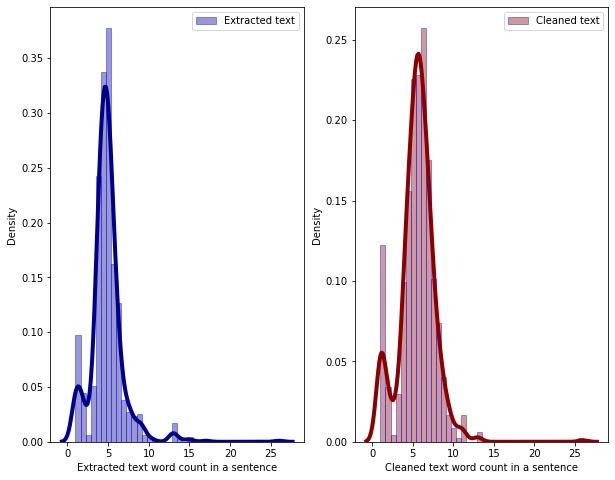

In [137]:
def avg_word(sentence):
    words=sentence.split()
    if len(words) == 0:
        pass
    else:
        return(sum(len(word) for word in words)/len(words))
    

f,ax = plt.subplots(1,2,figsize = (10,8))

sns.distplot(df['Data'].apply(lambda x: avg_word(x)), 
             hist=True, kde=True,
              bins = 40 ,color='darkblue',
              hist_kws={'edgecolor':'blue'},
              kde_kws={'linewidth':4}, ax=ax[0], label='Extracted text')

ax[0].set_xlabel('Extracted text word count in a sentence')
ax[0].legend()

sns.distplot(df['preprocessed_texts'].apply(lambda x: avg_word(x)), 
             hist=True, kde=True,
              bins = 40 ,color='darkred',
              hist_kws={'edgecolor':'blue'},
              kde_kws={'linewidth':4},  ax=ax[1], label='Cleaned text')

ax[1].set_xlabel('Cleaned text word count in a sentence')
ax[1].legend()
plt.show()


From above graph we find that most of the sentences having 5 words.

##Character Count

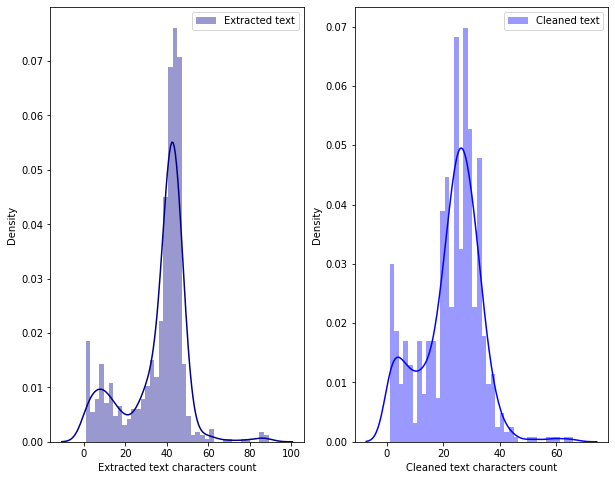

In [138]:
#checking cleaned text character visually with respect to extracted text
f,ax = plt.subplots(1,2,figsize = (10,8))

sns.distplot(df.Data.str.len(), hist=True,kde=True,
              bins= 40,color='darkblue', ax=ax[0], label='Extracted text')
ax[0].set_xlabel('Extracted text characters count')
ax[0].legend()

sns.distplot(df.preprocessed_texts.str.len(), hist=True,kde=True,
              bins= 40,color='b',  ax=ax[1], label='Cleaned text')

ax[1].set_xlabel('Cleaned text characters count')
ax[1].legend()
plt.show()


In extracted text characters count upto 100 while in cleaned text characters counts ranges upto 60 only.

We know that most of the cases name entities having more than 5 characters hence we are taking only that sentences which contain 5 or more than 5 characters.

In [141]:
df_final = df[df['Char_count'] > 5]

In [145]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679 entries, 1 to 805
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data                679 non-null    object 
 1   preprocessed_texts  679 non-null    object 
 2   Char_count          679 non-null    float64
dtypes: float64(1), object(2)
memory usage: 37.4+ KB


In [146]:
df_final.head()

,Data,preprocessed_texts,Char_count
1,9 Oral Answers SRAVANA 30.1912 (SAKA) Oraf Ans...,Oral Answers SRAVANA SAKA Oraf Answers,33.0
3,nglish],nglish,6.0
4,"SHRI DINESH GOSWAMI; Sir, I have",SHRI DINESH GOSWAMI Sir I,21.0
5,already answered this question. So far as my,already answered question So far,28.0
6,"Ministry is cx)ncerned, we will consider to",Ministry cx ncerned consider,25.0


Still dataset having some spell mistake but spell checker also disturb name entities hence we are not using spell checker

##Name Entities Recognition

Bert Based Ner (Huggingface pretrained model)

In [154]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 5.1 MB/s 
     |████████████████████████████████| 163 kB 40.5 MB/s 
     |████████████████████████████████| 7.6 MB 34.9 MB/s 


In [155]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)
# example = "My name is Wolfgang and I live in Berlin"

# ner_results = nlp(example)
# print(ner_results)

Downloading:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/829 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/433M [00:00<?, ?B/s]

In [160]:
for word in df_final['preprocessed_texts'][:5]:
  text1 = nlp(word)
  print(text1)

[{'entity': 'B-ORG', 'score': 0.99117917, 'index': 4, 'word': 'SR', 'start': 13, 'end': 15}, {'entity': 'I-ORG', 'score': 0.9915877, 'index': 5, 'word': '##AV', 'start': 15, 'end': 17}, {'entity': 'I-ORG', 'score': 0.99740845, 'index': 6, 'word': '##AN', 'start': 17, 'end': 19}, {'entity': 'I-ORG', 'score': 0.99086916, 'index': 7, 'word': '##A', 'start': 19, 'end': 20}, {'entity': 'I-ORG', 'score': 0.9936301, 'index': 8, 'word': 'SA', 'start': 21, 'end': 23}, {'entity': 'I-ORG', 'score': 0.98787713, 'index': 9, 'word': '##KA', 'start': 23, 'end': 25}, {'entity': 'I-ORG', 'score': 0.70174587, 'index': 10, 'word': 'Or', 'start': 26, 'end': 28}]
[]
[{'entity': 'B-ORG', 'score': 0.848462, 'index': 1, 'word': 'SH', 'start': 0, 'end': 2}, {'entity': 'I-ORG', 'score': 0.59746194, 'index': 2, 'word': '##RI', 'start': 2, 'end': 4}, {'entity': 'I-ORG', 'score': 0.9821968, 'index': 3, 'word': 'D', 'start': 5, 'end': 6}, {'entity': 'I-ORG', 'score': 0.96274143, 'index': 4, 'word': '##IN', 'start':

##Spacy Model

In [166]:
import spacy
#from spacy import displacy
NER = spacy.load("en_core_web_sm")


In [167]:
texts = []
Name_entities = []
for word in df_final['preprocessed_texts']:
  text1 = NER(word)
  for i in text1.ents:
    texts.append(i.text)
    Name_entities.append(i.label_)

In [169]:
NER_df = pd.DataFrame({"Text": texts, "Name_entities": Name_entities})
NER_df.sample(50)

,Text,Name_entities
84,Action Group,ORG
129,four month,DATE
134,Alsthom,PRODUCT
151,CALS,ORG
117,MINES,ORG
112,one,CARDINAL
4,Palana,ORG
234,Writtan Answers,ORG
23,National,ORG
216,Reserve Bank India,ORG
